# PRATICA INDEPENDENTE: Regressão logística. 

### Introdução.

#### Nessa prática independente estamos interessados em entender como os seguintes atributos descritivos afetam a probabilidade de admissão ou não admissão de cada candidato. 

* gre: Graduate Record Exam.
* gpa: Grade Point Average - nota média.
* Prestige: Prestígio da instituição de proveniência.

#### Para isso, é construída uma amostra de 400 pedidos de admissão em universidades, 10 universidades e as informações correspondentes são registradas.

#### A variável dependente é o resultado final da admissão, com o estudante admitido ($admit = 1$) ou não admitido ($admit = 0$).

#### Exercício 1: Importe as bibliotecas necessárias para a realização de uma análise exploratória e uma regressão logística  capaz de prever os casos de admissão. Crie um dataframe a partir dos dados do arquivo `'binary.csv'`. Lembre-se que o valor `prestige = 1` é o mais alto na escala de medidas desse atributo.

In [60]:
#Pacotes que serão usados
import statsmodels.api as sm
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split

# Tamanho padrões das figuras e a fonte de seus textos neste notebook
plt.rcParams['figure.figsize'] = (10, 8)
plt.rcParams['font.size'] = 14

In [61]:
dados= pd.read_csv('binary.csv')
dados.head()

,admit,gre,gpa,prestige
0,0,380,3.61,3
1,1,660,3.67,3
2,1,800,4.00,1
3,1,640,3.19,4
4,0,520,2.93,4


#### Exercício 2: Estude as medidas centrais da distribuição, faça a contagem dos valores de `admit` para ter uma ideia da distribuição de casos aceitos e não aceitos. 

#### Crie uma análise exploratória gráfica dos dados, com um gráfico do tipo  `pairplot` para todos os atributos do dataset. 

#### Faça também um gráfico do tipo `FacetGrid`, separando por `prestige` a população de casos `admit = 0` e `admit = 1`. Você pode usar os atributos `gre` e `gpa` como eixos das dispersões.

In [3]:
#a)Medidas centrais
dados.describe()

,admit,gre,gpa,prestige
count,400.000000,400.000000,400.000000,400.00000
mean,0.317500,587.700000,3.389900,2.48500
std,0.466087,115.516536,0.380567,0.94446
min,0.000000,220.000000,2.260000,1.00000
25%,0.000000,520.000000,3.130000,2.00000
50%,0.000000,580.000000,3.395000,2.00000
75%,1.000000,660.000000,3.670000,3.00000
max,1.000000,800.000000,4.000000,4.00000


In [4]:
#b)Contagem valores Admit
cont = dados['admit'].value_counts()
print(f'Número de não aceitos: {cont[0]}')
print(f'Número de aceitos: {cont[1]}')

Número de não aceitos: 273
Número de aceitos: 127


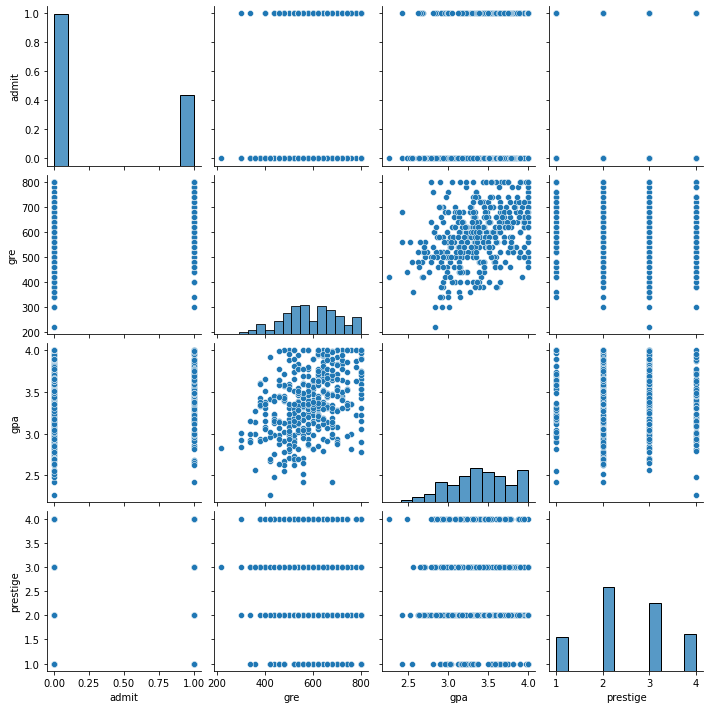

In [5]:
#c)Pairplot dos dados
sns.pairplot(dados);

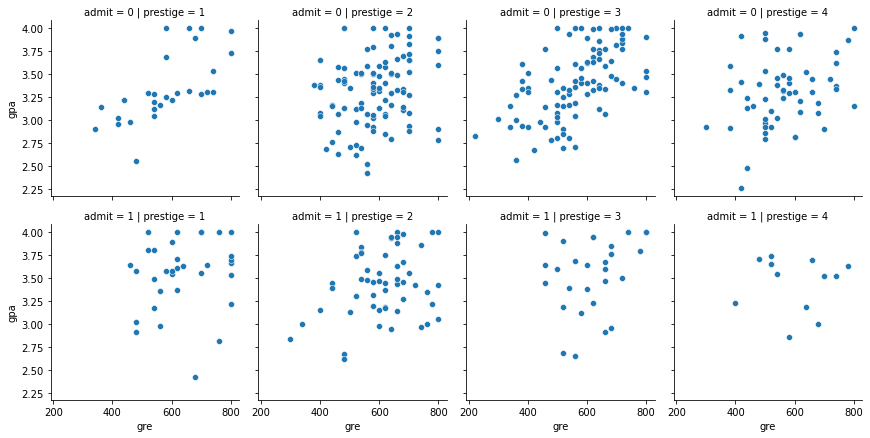

In [6]:
#d)Gráfico FacetGrid
g= sns.FacetGrid(dados, col='prestige', row= 'admit')

g.map_dataframe(sns.scatterplot, x='gre', y='gpa')

g.set_axis_labels('gre', "gpa");

É difícil perceber alguma correlação muito forte de acordo com a instituição do candidato. Isto pode nos indicar que o prestígio da instituição não possui tanta relevância na sua admissão ou não.

#### Exercício 3: Crie um conjunto de boxplots para as distribuições `gre`, `gpa` e `prestige`, em função dos valores de `admit` para entender melhor como cada um dos atributos acima influencia a admissão dos estudantes.

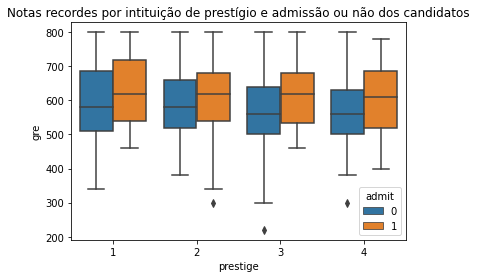

In [7]:
#a)gre
ax= sns.boxplot(x='prestige', y='gre', hue='admit',
                 data=dados)

ax.set_title('Notas recordes por intituição de prestígio e admissão ou não dos candidatos');

Aqueles que foram admitidos possuem uma concentração de notas recordes maiores do que aqueles que não. Ao contrário do gráfico de dispersão feito no exercício 2, agora podemos ver que de fato as notas daqueles em intituições de maior prestígio (1 é o maior prestígio), se concentram ligeiramente em valores mais altos (tanto dos candidatos admitidos quanto dos que não o foram): As caixas daqueles de instituição com maior prestígio estão acima daqueles com menor prestígio.

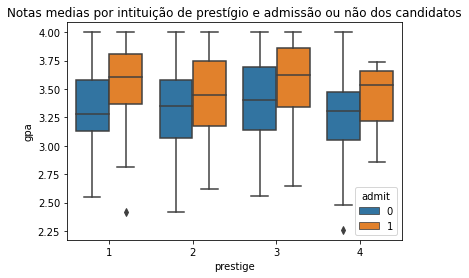

In [8]:
#a)gpa
ax= sns.boxplot(x='prestige', y='gpa', hue='admit',
                 data=dados)

ax.set_title('Notas medias por intituição de prestígio e admissão ou não dos candidatos');

Aqui á não percebemos a mesma relação no exercício anterior: vemos que as medias dos alunos admitidos se concentram de fato em valores maiores do que as daqueles que não foram admitidos. Porém, as instituições com maior prestígio já não estão com as notas medias concentradas em valores mais altos que as intituições de menores prestítgios.

Isto pode nos indicar que uma coisa é o candidato retirar uma nota alta em UMA prova, outra diferentes e mais complicada é manter a regularidade e manter suas notas em valores altos. Levando isso em conta, os alunos de instituição nível 3 demonstram maior regularidade nas suas notas, aparentemente.

#### Exercício 4: Crie também uma `crosstab()` cruzando os dados de admissão `admit` com o prestígio da instituição de origem do candidato, para estudar as contagens de admissão e inadmissão.

In [62]:
#Contagem de nãoa admitidos e não admitidos por prestígio da instituição
adm_por_instituicao = pd.crosstab(index= dados['prestige'], columns= dados['admit'])

#Porcentagem de não admitidos por prestígio da instituição
adm_por_instituicao['prop_nao_adm']= (adm_por_instituicao[0] / (adm_por_instituicao[0] + adm_por_instituicao[1])) * 100
adm_por_instituicao['prop_nao_adm']= round(adm_por_instituicao['prop_nao_adm'], 2)

#Porcentagem de admitidos por prestígio da instituição
adm_por_instituicao['prop_adm']= (adm_por_instituicao[1] / (adm_por_instituicao[0] + adm_por_instituicao[1])) * 100
adm_por_instituicao['prop_adm']= round(adm_por_instituicao['prop_adm'], 2)

In [63]:
adm_por_instituicao

admit,0,1,prop_nao_adm,prop_adm
prestige,,,,
1,28,33,45.90,54.10
2,97,54,64.24,35.76
3,93,28,76.86,23.14
4,55,12,82.09,17.91


Agora, ao contrário do gráfico de dispersão, podemos claramente ver que há sim a diferenção de admissão ou não admissão por prestígio da instituição.

A porcentagem de não admitidos AUMENTA quanto menor o prestígio da instituição e a porcentagem de admitidos DIMINUI quanto menor o prestígio das instituições.

#### Exercício 5: Realize a dmummiezação da variável `prestige`  com a função [`.get_dummies()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.get_dummies.html), instanciando um novo dataframe  e então concatene o novo dataframe dos atributos dummiezados com o dataframe original .

#### Separe os dados entre os atributos descritivos e o target e realize a divisão do dataframe em subconjuntos de treino e teste.

In [64]:
#Podemos utilizar o parâmetro drop_first igual a True para retirar a primeira coluna (no caso as instituições de prestígio 1)
#O modelo entenderá que se a observação não for de prestígio 2, 3 ou 4, ela será uma instituição de prestígio 1
dummy_prestige = pd.get_dummies(dados['prestige'], prefix= 'prestige', drop_first= True)
dummy_prestige.head()

,prestige_2,prestige_3,prestige_4
0,0,1,0
1,0,1,0
2,0,0,0
3,0,0,1
4,0,0,1


In [65]:
#Concatenando dataframe dummies dos prestígios com o original
dados_tratados = pd.concat([dados, dummy_prestige], axis= 1)

#Retirando coluna prestígio do dataframe gerado
dados_tratados.drop(labels= 'prestige', axis= 1, inplace= True)

#Conferindo mudanças
dados_tratados.head()

,admit,gre,gpa,prestige_2,prestige_3,prestige_4
0,0,380,3.61,0,1,0
1,1,660,3.67,0,1,0
2,1,800,4.00,0,0,0
3,1,640,3.19,0,0,1
4,0,520,2.93,0,0,1


In [108]:
#Separando variáveis preditoras
X= dados_tratados[['gre',	'gpa', 'prestige_2', 'prestige_3', 'prestige_4']]

#Separando variável que queremos prever
y= dados_tratados['admit']

#Separando conjuntos de treino e de teste
X_treino, X_teste, y_treino, y_teste = train_test_split(X, y)

#### Exercício 6: Aplique o processo de criação de uma regressão logística com a padronização dos dados. 

#### Submeta os dados às regressões estudadas com o auxílio das bibliotecas `sklearn` e `statsmodels` e discuta os resultados.

#### padronização:

In [87]:
from sklearn import preprocessing
#Treinando dados de treino para padronização
scaler = preprocessing.StandardScaler().fit(X)

#Dados de treino padronizados
X_escalonado = scaler.transform(X)

#### 6-a) Regressão Logística com o `sklearn`:

Vamos utilizar o método KFold que divide os dados em conjuntos de treino e teste de forma aleatória um determinado número de vezes e guardar as métricas e parâmetros tida(o)s com cada conjunto gerado.

In [88]:
#Instanciando objeto KFold com seus argumentos
kf = KFold(n_splits = 10, #numero de conjuntos de treino e teste que o KFold irá gerar
           shuffle = True, #Aleatoriedade dos conjuntos de treino e teste
           random_state = 1 # ''
          )

#Instanciando objeto LogisticRegression para aplicar o modelo em cada conjunto gerado
logit = LogisticRegression()

In [89]:
kf_y_preds = [] #lista que guardará as predições de cada conjunto
kf_model = [] #lista que guardará o modelo de cada conjunto
kf_coefs = [] #lista que guardará os coeficientes de cada conjunto
kf_scores = [] #lista que guardará a proporção de acertos de cada conjunto
kf_matrix = [] #lista que guardará a matriz de confusão de cada conjunto

In [90]:
#Gerando 10 conjuntos de treino e teste aleatórios e guardando as informações de cada um nas listas explicadas acima 
for k, (treino_index, teste_index) in enumerate(kf.split(X_escalonado)):
    
    model = logit.fit(X_escalonado[treino_index], 
                      y[treino_index]
                     )
    kf_model.append(model)
    
    coefs = model.coef_
    
    y_preds = model.predict(X_escalonado[teste_index])
    
    kf_y_preds.append(y_preds)
    
    kf_coefs.append(coefs)
    
    scores = accuracy_score(y[teste_index],
                            y_preds
                           )
    
    kf_scores.append(scores)
    
    matrix = confusion_matrix(y[teste_index], 
                              y_preds
                             )
    
    kf_matrix.append(matrix)
    
    print("K", k, " = ", scores, sep = "")

K0 = 0.65
K1 = 0.75
K2 = 0.85
K3 = 0.65
K4 = 0.825
K5 = 0.6
K6 = 0.625
K7 = 0.6
K8 = 0.825
K9 = 0.65


Podemos avaliar o desempenho desse modelo tirando a média dos coeficientes de determinação dos valores da lista kf_scores.

In [119]:
print(f'Acurácia media: {np.mean(kf_scores) * 100}%')
print(f'Total de linhas: {len(dados_tratados)}')

Acurácia media: 70.25%
Total de linhas: 400


Vemos que não temos um modelo com uma performance tão boa, tendo em media 70.25% de acertos.

A melhor performance foi com os parâmetros no k==4. Vamos olhar a matriz de confusão de tal modelo

In [94]:
kf_matrix[4]

array([[31,  1],
       [ 6,  2]])

A matriz de confusão nos indica que de 31 previsões que o modelo disse que era admitido ele acertou (era de fato admitido);

1 disse que era não adimitdo e era admitido;

De 6 que o modelo disse que era admitido, era na verdade não admitido.
E de 2 que disse que não era admitido ele acertou (era de fato não admitido).

Nesse sentido, ele teve um maior numero de acertos naqueles que eram de fato admitidos e poucos erros naqueles que não o eram.

####6-b) Regressão Logística com o  `statsmodels`:

Utilizando o statsmodel precisamos adicionar a constante (intercepto) dos dados primeiro, já que a biblioteca não faz automaticamente como no SKLearn

In [109]:
#Constante do modelo de regressão logística dos nossos dados
X = sm.tools.add_constant(X)

In [110]:
#Separação de dados de treino e teste
X_treino, X_teste, y_treino, y_teste = train_test_split(X, y)

In [111]:
#Instanciando objeto de regressão logística do StatsModel
logistica = sm.Logit(y_treino, X_treino)

#Treinando modelo
resultado = logistica.fit()

#Olhando sumário de métricas e valores estatísticos do modelo gerado
print(resultado.summary2())

Optimization terminated successfully.
         Current function value: 0.578968
         Iterations 5
                         Results: Logit
Model:              Logit            Pseudo R-squared: 0.069     
Dependent Variable: admit            AIC:              359.3809  
Date:               2021-02-22 15:12 BIC:              381.6036  
No. Observations:   300              Log-Likelihood:   -173.69   
Df Model:           5                LL-Null:          -186.52   
Df Residuals:       294              LLR p-value:      0.00010366
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     5.0000                                       
------------------------------------------------------------------
               Coef.   Std.Err.     z     P>|z|    [0.025   0.975]
------------------------------------------------------------------
const         -3.4785    1.3023  -2.6710  0.0076  -6.0310  -0.9260
gre            0.0028    0.0012   2.2421  0.0250   0.0004   0.

O parâmetro P > |z| nos indica sobre a real significancia da variável em questão na construção do modelo. Se este valor for menor que 0.05, podemos indicar que a variável possui (com 95% de confiança) relevância na variável que queremos prever. Nesse caso podemos retirar a variável gpa e reavaliar is números do modelo. 

Repare também que o pseudo R² deu um valor muito baixo, isso pode nos indicar tanto que a variável GPA está afetando nosso modelo de forma negativa; quanto nosso baixo número de dados e/ou que as variáveis preditoras não explicam bem a a admissão ou não de alguém.

In [112]:
#Retirando variável GPA dos dados
X.drop(labels= 'gpa', axis= 1, inplace= True)

#Recalculando a constante com o novo dataset
X = sm.tools.add_constant(X) #Constante do modelo de regressão logística dos nossos dados

#Separação de dados de treino e teste
X_treino, X_teste, y_treino, y_teste = train_test_split(X, y)

#Instanciando objeto de regressão logística do StatsModel
logistica = sm.Logit(y_treino, X_treino)

#Treinando modelo
resultado = logistica.fit()

#Olhando sumário de métricas e valores estatísticos do modelo gerado
print(resultado.summary2())

Optimization terminated successfully.
         Current function value: 0.588342
         Iterations 5
                         Results: Logit
Model:              Logit            Pseudo R-squared: 0.079     
Dependent Variable: admit            AIC:              363.0050  
Date:               2021-02-22 15:12 BIC:              381.5239  
No. Observations:   300              Log-Likelihood:   -176.50   
Df Model:           4                LL-Null:          -191.64   
Df Residuals:       295              LLR p-value:      4.3027e-06
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     5.0000                                       
------------------------------------------------------------------
               Coef.   Std.Err.     z     P>|z|    [0.025   0.975]
------------------------------------------------------------------
const         -1.7560    0.7680  -2.2863  0.0222  -3.2613  -0.2507
gre            0.0033    0.0012   2.8214  0.0048   0.0010   0.

Vamos olhar a matriz de confusão do modelo. Aqui vamos indicar que se houver maior que 50% de probabilidade de alguém ser admitido, iremos indicar como admitido, do contrário, vamos indicar que não será admitido.

In [118]:
y_pred = resultado.predict(X_teste) > 0.5

matriz_conf = confusion_matrix(y_teste, y_pred)
acertos= matriz_conf[0][0] + matriz_conf[1][1]
erros= matriz_conf[0][1] + matriz_conf[1][0]
acertos_adm= matriz_conf[0][0]
erros_adm= matriz_conf[0][1]
acertos_nao_adm= matriz_conf[1][1]
erros_nao_adm= matriz_conf[1][0]

print(f'Total de acertos: {acertos}')
print(f'Total de acertos admitidos (previsão era admitidos): {acertos_adm}')
print(f'Total de acertos não eram admitidos (previsão não eram admitidos): {acertos_nao_adm}')

print()
print(f'Total de erros: {erros}')
print(f'Total de erros admitidos (previsão era admitidos): {erros_adm}')
print(f'Total de erros não admitidos (previsão não era admitidos): {erros_nao_adm}')

Total de acertos: 77
Total de acertos admitidos (previsão era admitidos): 68
Total de acertos não eram admitidos (previsão não eram admitidos): 9

Total de erros: 23
Total de erros admitidos (previsão era admitidos): 6
Total de erros não admitidos (previsão não era admitidos): 17


In [116]:
matriz_conf

array([[68,  6],
       [17,  9]])

Vemos que a maior parte dos acertos do modelo (68) foram daqueles que foram de fato admitidos.

A menor parte de acertos (6) foram daqueles que o modelo indicou como admitidos e não o foram.

Neste caso, podemos pensar que é preferível que o modelo erre menos onde de fato errou, isto é, aqueles que disse que era admitido e não o foram do que naqueles que ele previu como não admitidos e o foram.

Porém, se este modelo tivesse em vista esta previsão para o candidato planejar a sua vida tendo em vista a admissão ou não admissão, o planejar com antecedência a mudança de cidade, por exemplo, baseado na predição de que será admitido seria mais problemático.